In [1]:
import scanpy as sc
import pandas as pd

adata = sc.read_h5ad(r"C:\Users\jtspy\OneDrive\Desktop\PersonalProject\NSCLC_Project\NSCLC-scRNA-Analysis\data\raw\figshare\raw_counts.h5ad")

metadata = pd.read_csv(
    r"C:\Users\jtspy\OneDrive\Desktop\PersonalProject\NSCLC_Project\NSCLC-scRNA-Analysis\data\raw\figshare\metadata.csv",
    index_col=0
)

C:\Users\jtspy\AppData\Local\Temp\ipykernel_48008\2083235528.py:6: DtypeWarning: Columns (13,16,18) have mixed types. Specify dtype option on import or set low_memory=False.
  metadata = pd.read_csv(


In [2]:
adata.obs = metadata


adata.write(
    r"C:\Users\jtspy\OneDrive\Desktop\PersonalProject\NSCLC_Project\NSCLC-scRNA-Analysis\data\raw\figshare\raw_counts_with_metadata.h5ad"
)

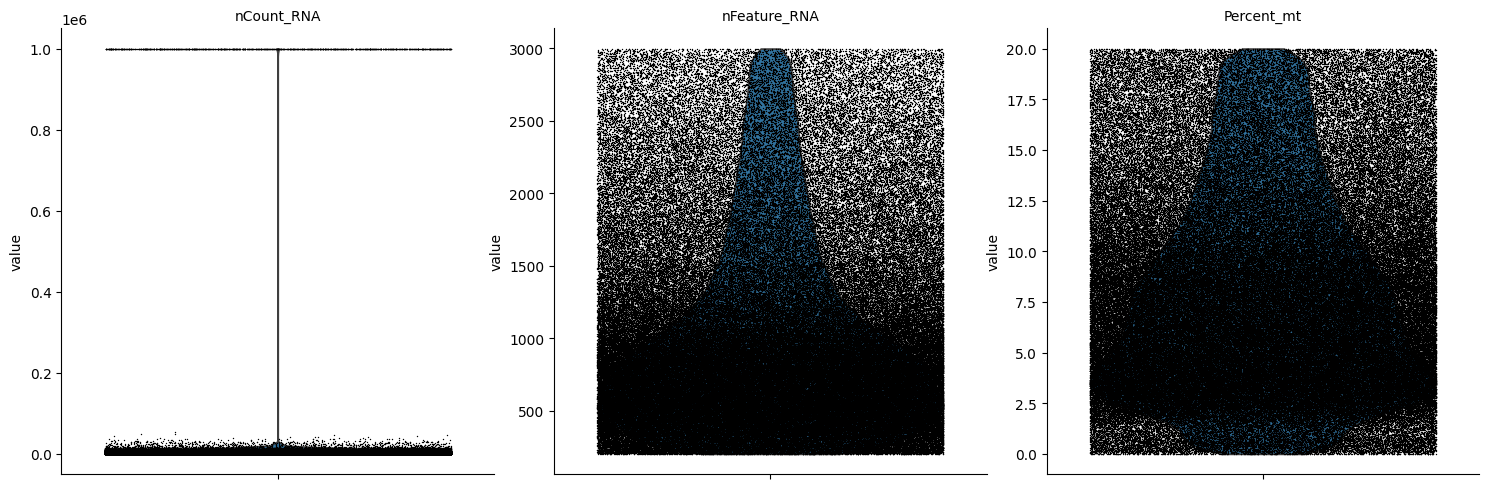

In [3]:
# Figure 1: Violin plots for QC metrics before filtering
sc.pl.violin(
    adata,
    keys=["nCount_RNA", "nFeature_RNA", "Percent_mt"],
    jitter=0.4,
    multi_panel=True
)

In [4]:
adata_qc = adata.copy()

# Apply filters for cells only (we will filter genes later)
adata_qc = adata_qc[
    (adata_qc.obs["nCount_RNA"] >= 500) &
    (adata_qc.obs["nCount_RNA"] <= 50000) &
    (adata_qc.obs["nFeature_RNA"] >= 300) &
    (adata_qc.obs["Percent_mt"] <= 15),
    :
]

In [5]:
print(f"Cells before QC: {adata.n_obs}")
print(f"Cells after QC:  {adata_qc.n_obs}")

Cells before QC: 224611
Cells after QC:  178971


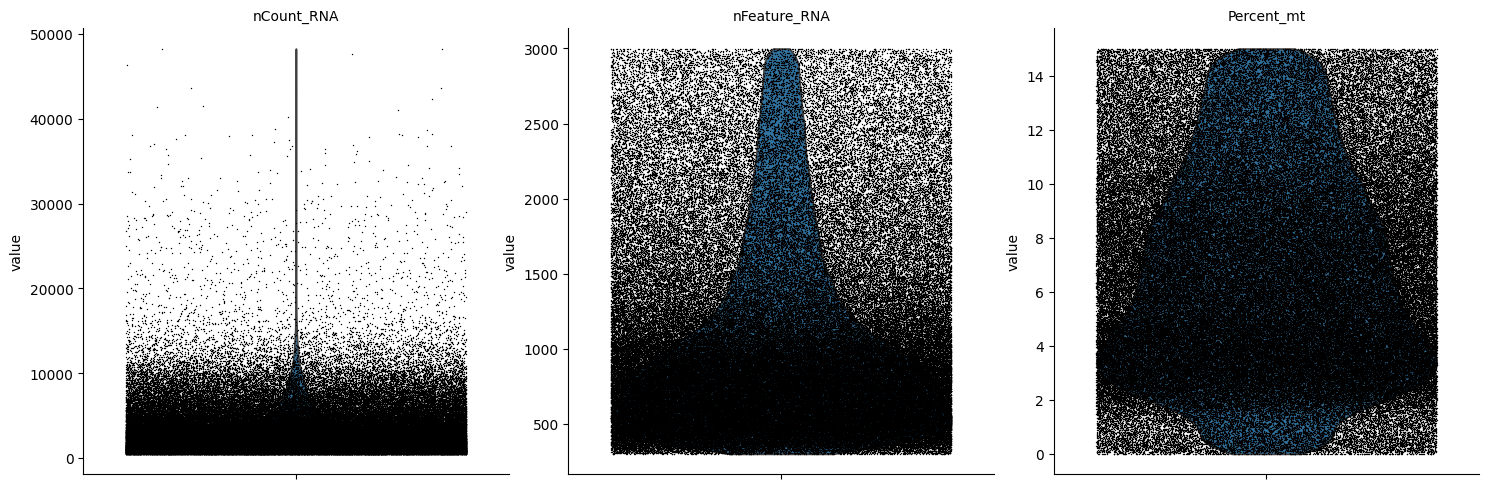

In [6]:
# Figure 2: Violin plots for QC metrics after filtering
sc.pl.violin(
    adata_qc,
    keys=["nCount_RNA", "nFeature_RNA", "Percent_mt"],
    jitter=0.4,
    multi_panel=True
)

In [7]:
adata_qc.write(
    r"C:\Users\jtspy\OneDrive\Desktop\PersonalProject\NSCLC_Project\NSCLC-scRNA-Analysis\data\raw\figshare\qc_filtered.h5ad"
)